In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [260]:
my_data=pd.read_csv("dataset.csv")

In [261]:
my_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [262]:
le = preprocessing.LabelEncoder()
new_gender=le.fit_transform(my_data["gender"])
my_data["gender"]=new_gender
new_ever_married=le.fit_transform(my_data["ever_married"])
my_data["ever_married"]=new_ever_married
new_Residence_type=le.fit_transform(my_data["Residence_type"])
my_data["Residence_type"]=new_Residence_type

In [263]:
pd.get_dummies(my_data['work_type'])
my_data = pd.get_dummies(my_data, columns=['work_type'])
pd.get_dummies(my_data['smoking_status'])
my_data = pd.get_dummies(my_data, columns=['smoking_status'])
my_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


/Users/asena/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

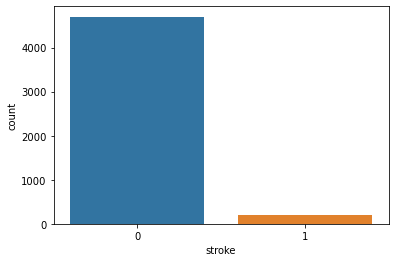

In [271]:
sns.countplot(my_data['stroke'])

In [264]:
my_data=my_data[["gender","age","hypertension","heart_disease","ever_married","work_type_Govt_job","work_type_Never_worked","work_type_Private","work_type_Self-employed","work_type_children","Residence_type","avg_glucose_level","bmi","smoking_status_Unknown","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes","stroke"]]


In [265]:
my_data=my_data.dropna()

In [266]:
X=my_data.drop("stroke",axis=1)
y=my_data["stroke"]

In [267]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)                   

In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
my_data[["age"]] = scaler.fit_transform(my_data[["age"]])
my_data[["avg_glucose_level"]] = scaler.fit_transform(my_data[["avg_glucose_level"]])
my_data[["bmi"]] = scaler.fit_transform(my_data[["bmi"]])
my_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.816895,0,1,1,0,0,1,0,0,1,0.801265,0.301260,0,1,0,0,1
2,1,0.975586,0,1,1,0,0,1,0,0,0,0.234512,0.254296,0,0,1,0,1
3,0,0.597168,0,0,1,0,0,1,0,0,1,0.536008,0.276060,0,0,0,1,1
4,0,0.963379,1,0,1,0,0,0,1,0,0,0.549349,0.156930,0,0,1,0,1
5,1,0.987793,0,0,1,0,0,1,0,0,1,0.605161,0.214204,0,1,0,0,1


In [269]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)
y_pred= clf.predict(X_test)
print("Accuracy on Traing set: ",clf.score(X_train,y_train))
print("Accuracy on Testing set: ",clf.score(X_test,y_test))

Accuracy on Traing set:  0.9606112054329372
Accuracy on Testing set:  0.9526476578411406


In [270]:
#with open("Results.txt", 'w') as file:
#     for pred in y_pred[100:200]:
#            file.write(str(pred)+"\n")